<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/2_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 장애인콜택시 대기시간 예측

탐색적 데이터 분석

## 1.환경설정

### (1) 경로 설정

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### (2) 라이브러리 설치 및 불러오기

In [ ]:
!pip install -r requirements.txt

  Obtaining dependency information for pandas==1.5.3 from https://files.pythonhosted.org/packages/da/6d/1235da14daddaa6e47f74ba0c255358f0ce7a6ee05da8bf8eb49161aa6b5/pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for matplotlib==3.7.1 from https://files.pythonhosted.org/packages/fb/8c/391e3c105edb7e193bb163ed48988135228d0b5ce3143e1cbec2350e23c8/matplotlib-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for xgboost=

ERROR: Cannot install -r requirements.txt (line 1) and numpy==1.22.4 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib


### (3) 데이터 불러오기

In [ ]:

from joblib import load
data1 = load('data1(나).pkl')

In [ ]:

data1.head(2)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,...,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,7_day_wait_time_mean,Cancel,Total_wait,Boarding_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,...,0.0,73.0,37.0,8.66,Winter,0.0,NaN,0.001082,23733.6,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,...,0.0,89.0,58.0,5.32,Winter,0.0,NaN,0.000352,54317.6,0.898987


In [ ]:

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2922 non-null   datetime64[ns]
 1   Car_count             2922 non-null   int64         
 2   Register              2922 non-null   int64         
 3   Boarding              2922 non-null   int64         
 4   Wait_time             2922 non-null   float64       
 5   Average_mean          2922 non-null   int64         
 6   Riding_mean           2922 non-null   int64         
 7   Day_of_week           2922 non-null   category      
 8   Month                 2922 non-null   int32         
 9   Year                  2922 non-null   int32         
 10  waiting_time          2921 non-null   float64       
 11  temp_max              2920 non-null   float64       
 12  temp_min              2920 non-null   float64       
 13  rain(mm)          

In [ ]:

data1.describe()


,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,7_day_wait_time_mean,Cancel,Total_wait,Boarding_rate
count,2922,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2921.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2922.000000,2916.000000,2922.000000,2922.000000,2922.000000
mean,2018-12-31 12:00:00,418.701916,3925.607803,3283.895277,40.305681,2304.272416,9253.500000,6.522930,2018.499658,40.311537,...,9.420890,3.357911,79.109589,41.123904,13.499209,0.007871,40.322693,0.000383,164435.114476,0.841577
min,2015-01-01 00:00:00,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000,1.000000,2015.000000,17.200000,...,-18.500000,0.000000,29.000000,7.000000,0.000000,0.000000,18.800000,0.000193,11107.200000,0.596996
25%,2016-12-31 06:00:00,278.000000,2162.500000,1779.000000,29.600000,2228.000000,8521.000000,4.000000,2016.250000,29.600000,...,0.500000,0.000000,70.000000,29.000000,8.237500,0.000000,31.357143,0.000236,86197.000000,0.805960
50%,2018-12-31 12:00:00,454.000000,4720.500000,3932.500000,38.200000,2257.000000,8821.500000,7.000000,2018.500000,38.200000,...,10.000000,0.000000,82.000000,39.000000,12.685000,0.000000,39.042857,0.000254,157152.300000,0.845615
75%,2020-12-30 18:00:00,522.000000,5110.000000,4241.000000,48.600000,2400.750000,10153.000000,10.000000,2020.000000,48.600000,...,18.900000,0.300000,90.000000,51.000000,18.585000,0.000000,47.007143,0.000562,231610.275000,0.877720
max,2022-12-31 00:00:00,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000,12.000000,2022.000000,96.100000,...,30.400000,178.900000,100.000000,98.000000,30.790000,1.000000,83.928571,0.002165,464160.000000,0.968844
std,NaN,133.755162,1509.741713,1249.165876,14.098550,107.260080,1019.198152,3.449293,2.291531,14.097409,...,10.781166,12.599812,14.023410,16.402575,6.941744,0.088386,12.029476,0.000225,91278.118428,0.052172


## 2.EDA : 1단계 - 개별 정보 분석하기

### (1) 단변량 분석 함수 작성

In [ ]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [ ]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
Register,2922.0,3925.607803,1509.741713,527.0,2162.5,4720.5,5110.0,6182.0


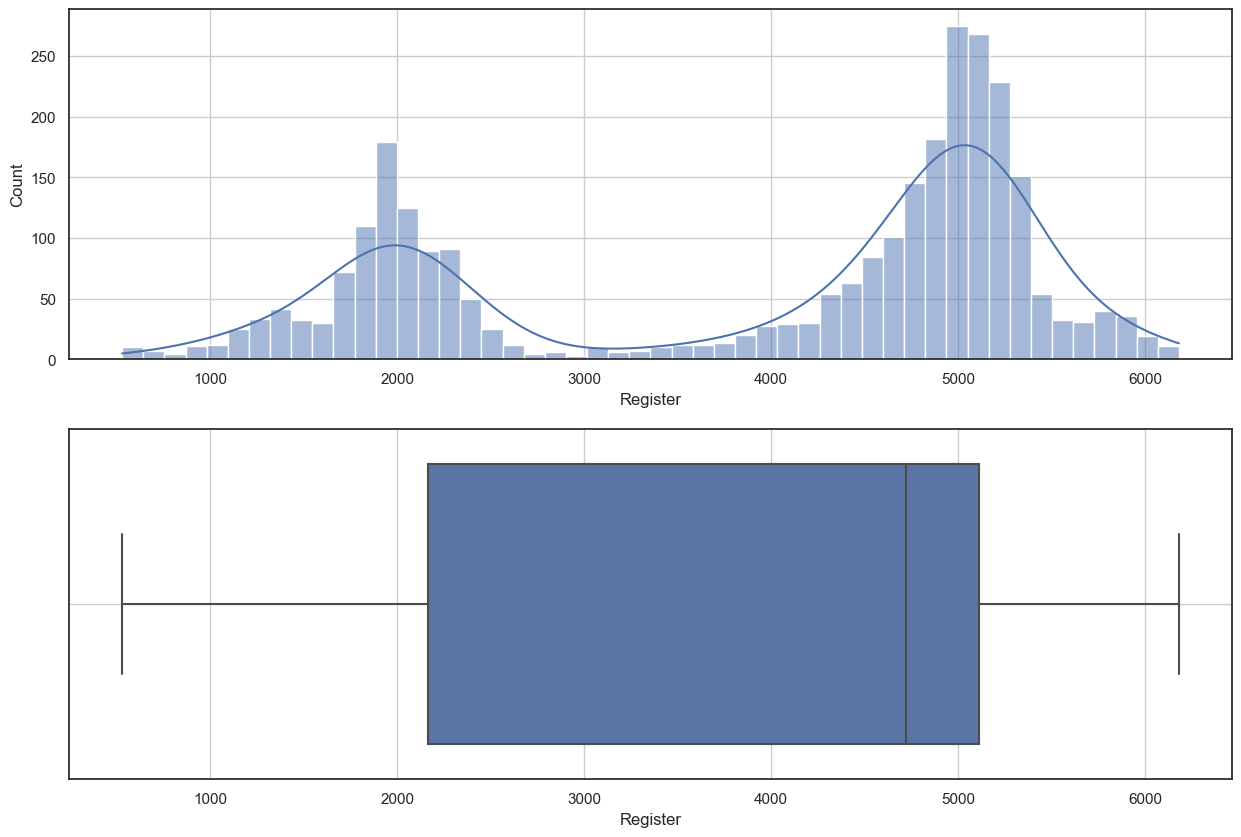

In [ ]:

eda_1_n(data1, 'Register', hue_var = '')

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
Boarding,2922.0,3283.895277,1249.165876,462.0,1779.0,3932.5,4241.0,5189.0


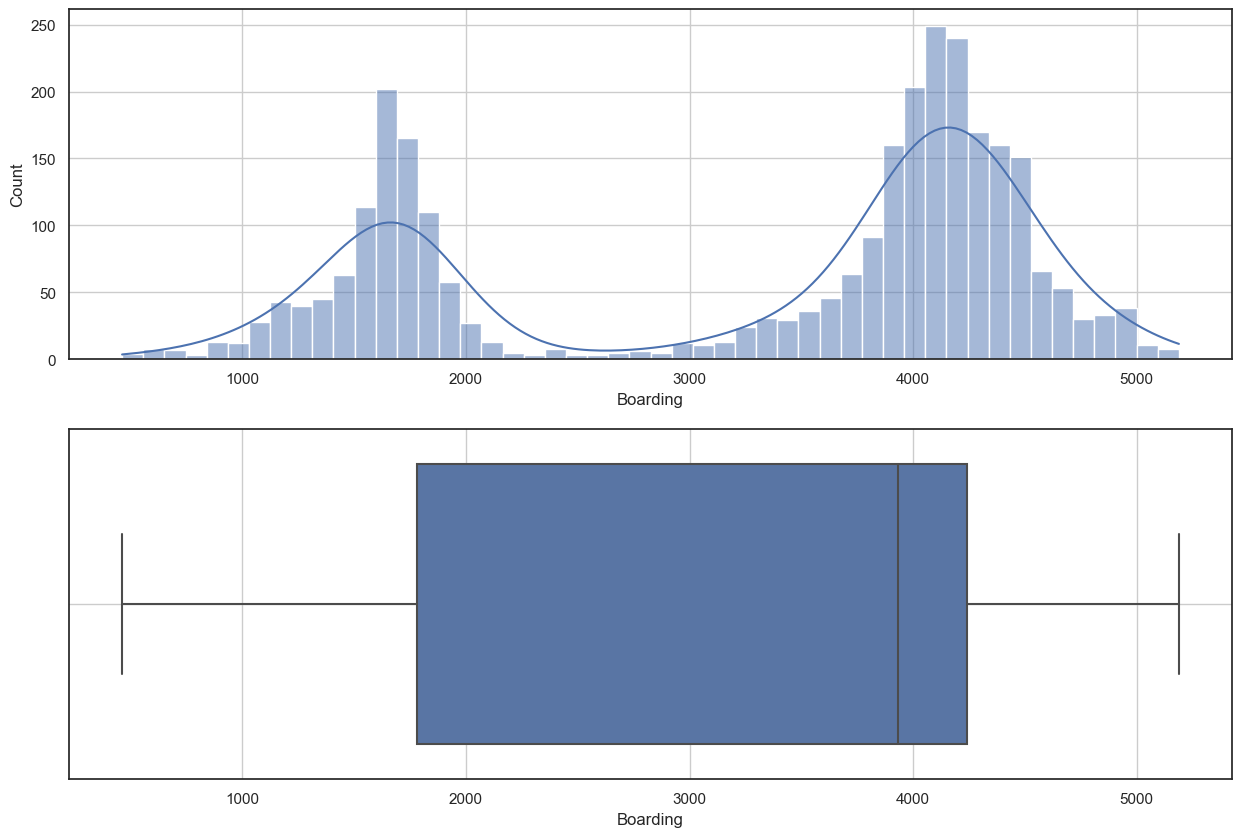

In [ ]:

eda_1_n(data1, 'Boarding', hue_var = '')


#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
Average_mean,2922.0,2304.272416,107.26008,2131.0,2228.0,2257.0,2400.75,2733.0


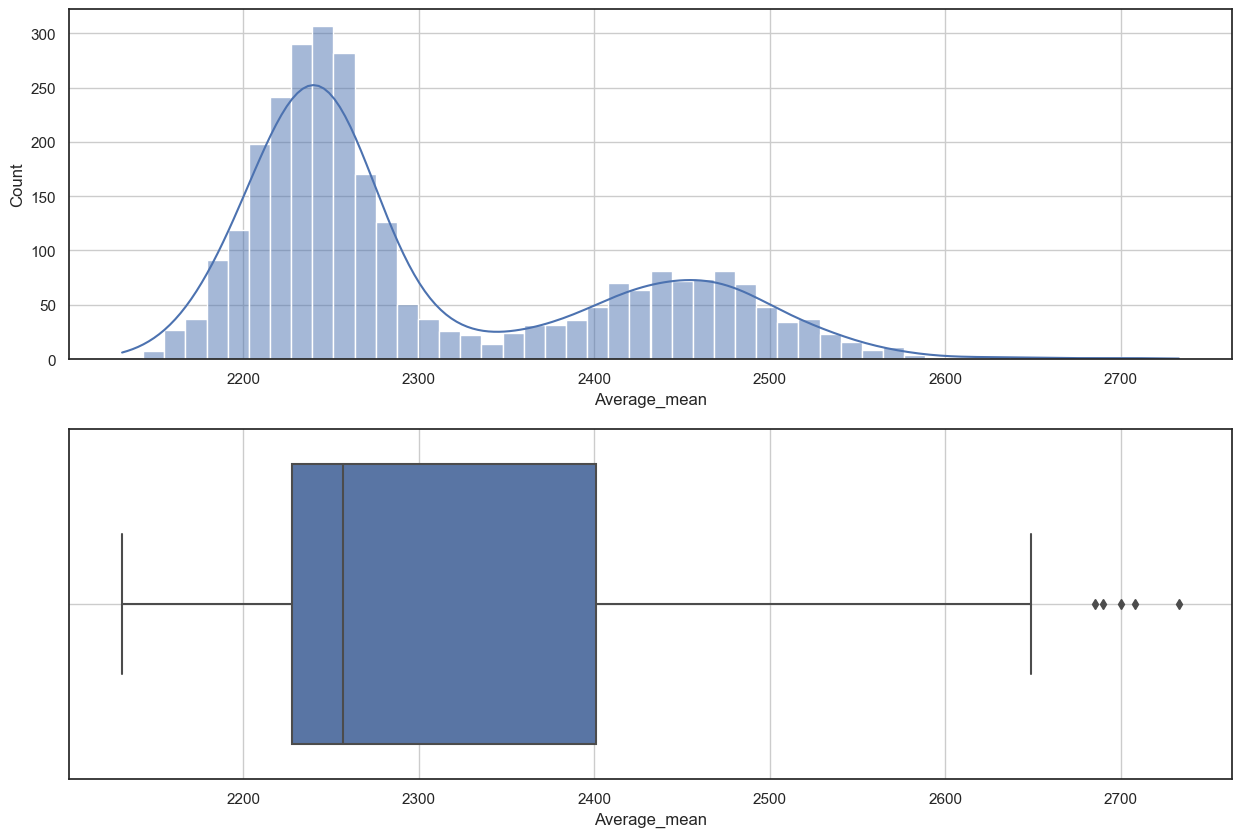

In [ ]:

eda_1_n(data1, 'Average_mean', hue_var = '')


#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
Riding_mean,2922.0,9253.5,1019.198152,7672.0,8521.0,8821.5,10153.0,14136.0


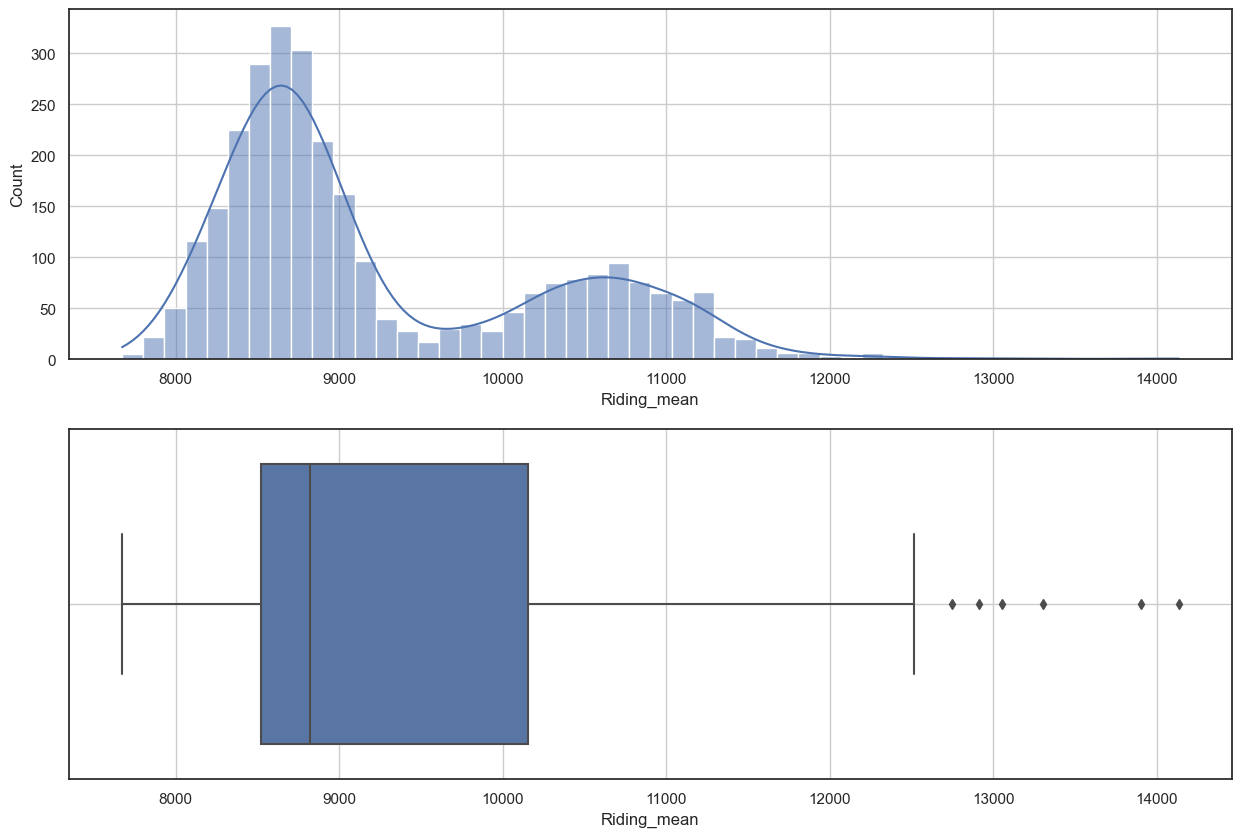

In [ ]:

eda_1_n(data1, 'Riding_mean', hue_var = '')


#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
Boarding,2922.0,3283.895277,1249.165876,462.0,1779.0,3932.5,4241.0,5189.0


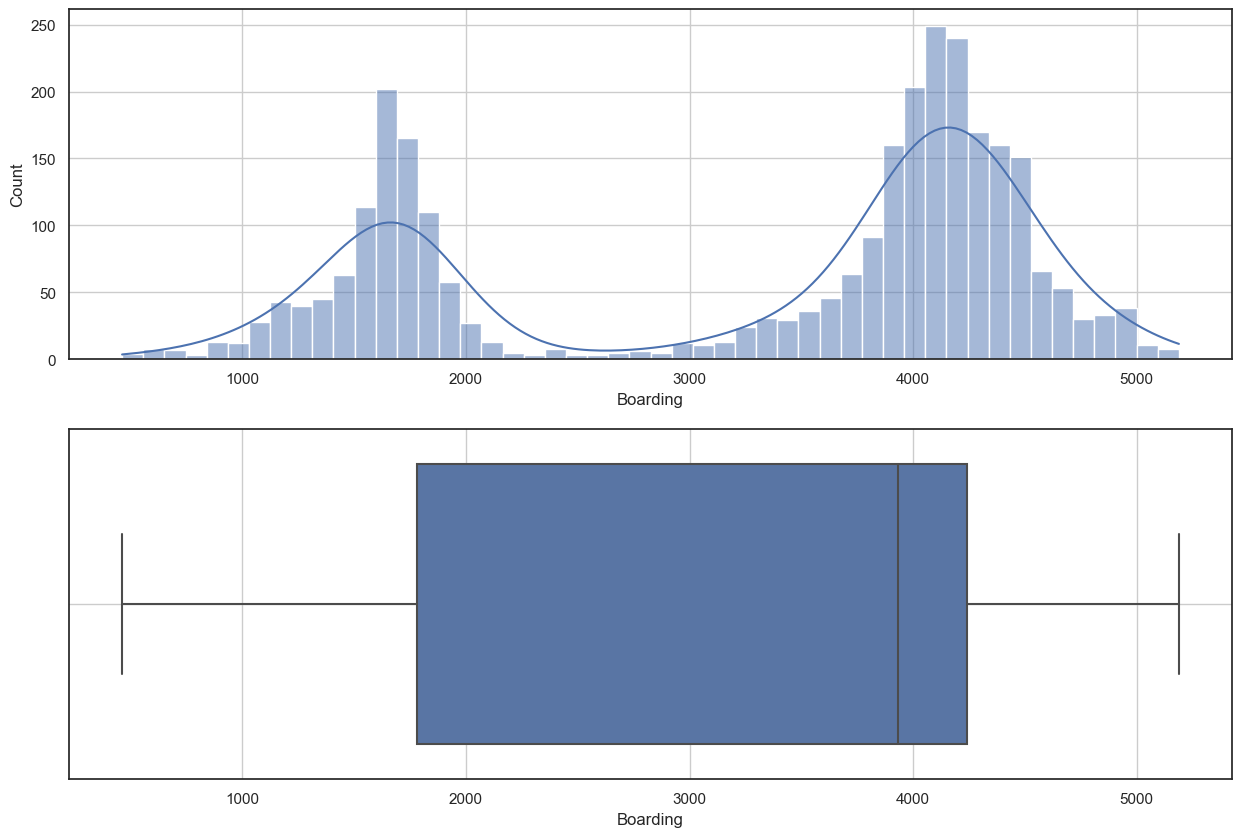

In [ ]:

eda_1_n(data1, 'Boarding', hue_var = '')

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
sunshine(MJ/m2),2920.0,13.499209,6.941744,0.0,8.2375,12.685,18.585,30.79


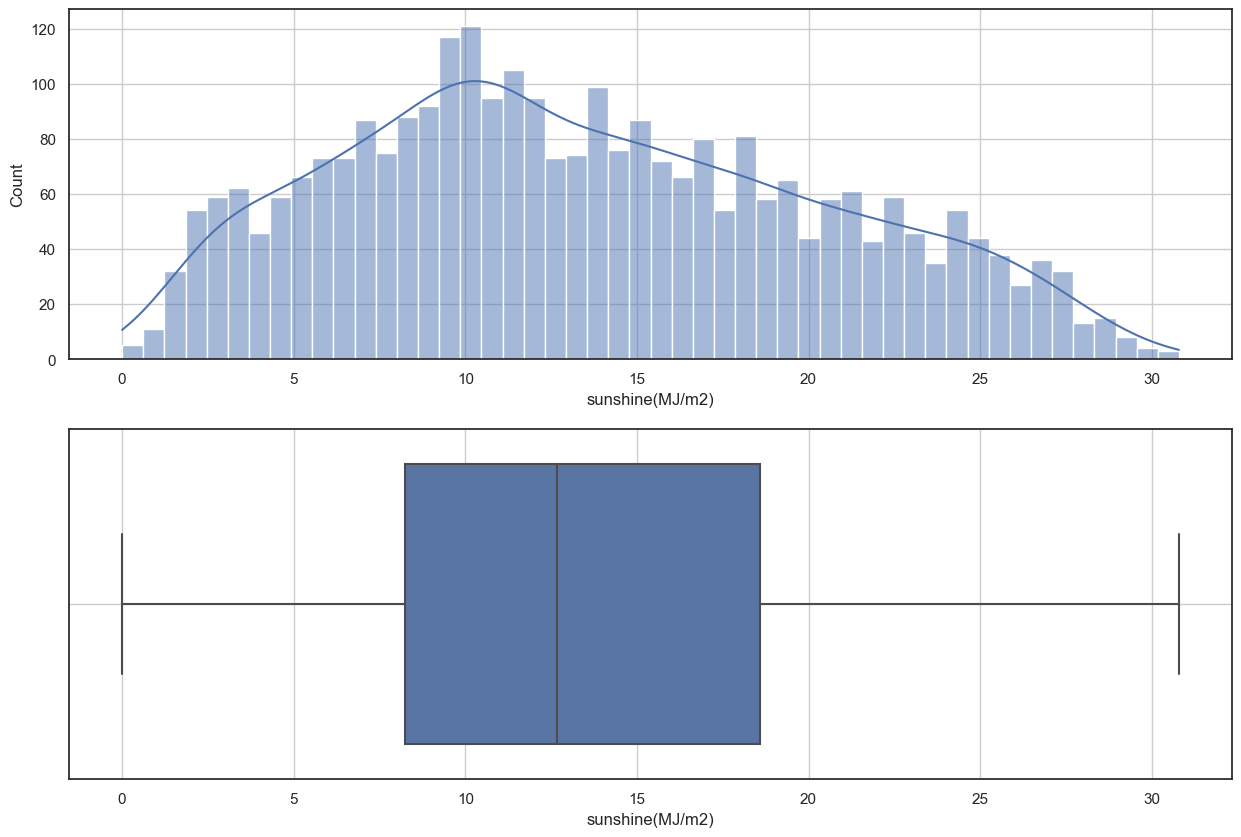

In [ ]:
eda_1_n(data1, 'sunshine(MJ/m2)', hue_var = '')


#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2920.0,3.357911,12.599812,0.0,0.0,0.0,0.3,178.9


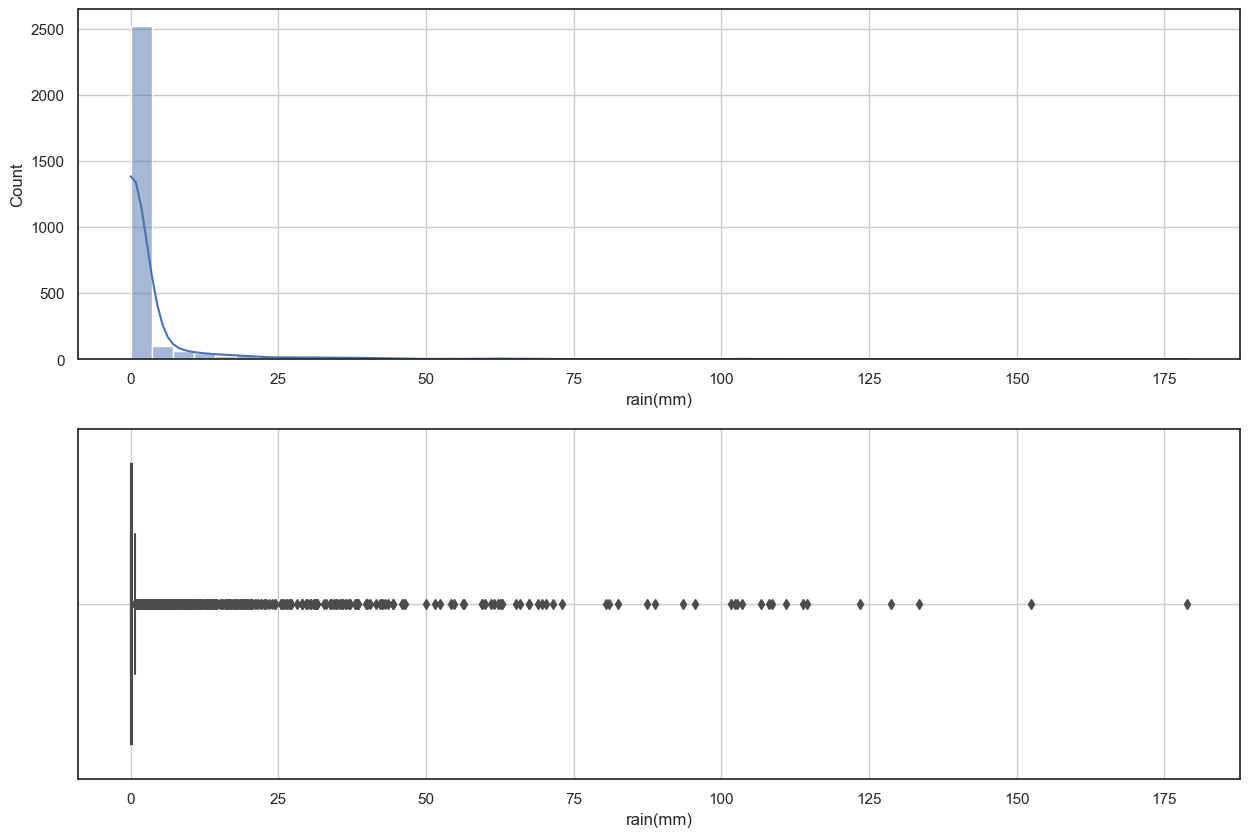

In [ ]:

eda_1_n(data1, 'rain(mm)', hue_var = '')


### (3) 범주형 변수

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0.0,2899,0.992129
1.0,23,0.007871


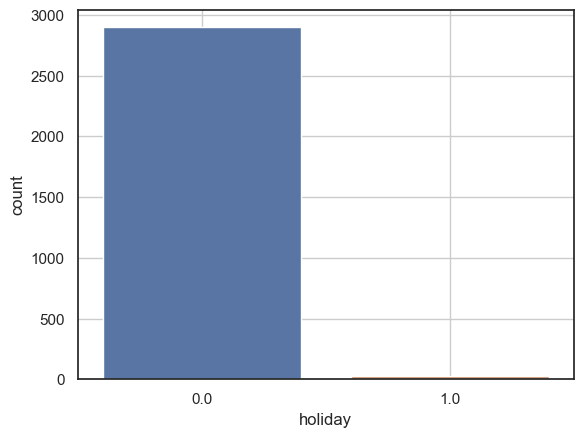

In [ ]:

eda_1_c(data1, 'holiday', hue_var = '')


## 3.feature와 target 비교 분석하기



### (1) 숫자 feature --> Target


#### 1) 전체 상관계수 시각화

In [ ]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

In [ ]:
data1.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Day_of_week', 'Month', 'Year',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'season', 'holiday',
       '7_day_wait_time_mean', 'Cancel', 'Total_wait', 'Boarding_rate'],
      dtype='object')

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday,7_day_wait_time_mean,Cancel,Total_wait,Boarding_rate
Car_count,1.0,0.885889,0.904672,0.035818,-0.844675,-0.857679,0.087627,0.115829,0.120284,0.004662,0.053149,0.100709,0.069648,-0.099274,-0.069125,-0.797363,0.599216,-0.028601
Register,0.0,1.000000,0.988752,0.291891,-0.850307,-0.847743,0.316181,0.065460,0.065664,-0.014648,-0.007598,0.017463,0.014305,-0.102210,0.186016,-0.911328,0.807483,-0.251526
Boarding,0.0,0.000000,1.000000,0.184340,-0.867915,-0.858609,0.229127,0.071878,0.070780,-0.014450,0.000474,0.027500,0.028513,-0.110745,0.079146,-0.914235,0.729971,-0.117813
Wait_time,0.0,0.000000,0.000000,1.000000,0.020257,-0.013197,0.732299,0.040884,0.033521,-0.007635,-0.053350,-0.087606,-0.054998,-0.056988,0.842009,-0.240708,0.757150,-0.770392
Average_mean,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977569,-0.048772,0.066203,0.056535,0.026635,0.014170,-0.034308,0.004206,0.039533,0.122805,0.790505,-0.550296,0.008032
Riding_mean,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.083855,0.070700,0.060603,0.020600,0.016159,-0.038245,-0.005455,0.048373,0.078680,0.774168,-0.571758,0.048126
waiting_time,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.040118,0.033649,-0.005853,-0.041289,-0.087477,-0.044567,-0.012576,0.799468,-0.250404,0.654345,-0.588797
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961569,0.116800,0.306197,0.284396,0.475255,0.033874,0.035210,-0.076481,0.065479,0.020396
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201778,0.400784,0.461865,0.308321,0.026566,0.027185,-0.074789,0.063403,0.016762
rain(mm),0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.335386,0.446513,-0.285547,0.012106,-0.015033,0.010523,-0.013740,0.000747


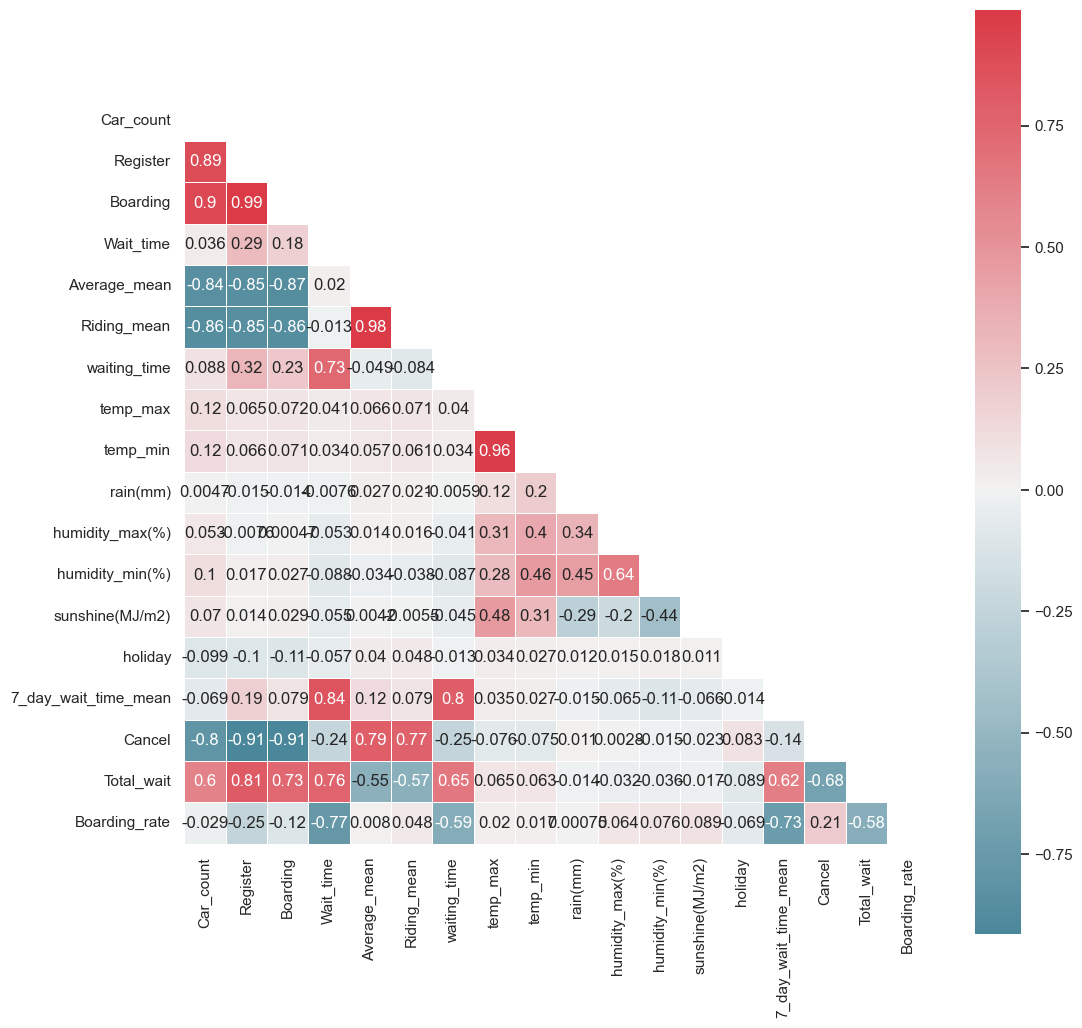

In [ ]:
num_vars = ['Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'holiday','7_day_wait_time_mean', 'Cancel','Total_wait','Boarding_rate']

eda_2_corr(data1, num_vars)

#### 2) 산점도

In [ ]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

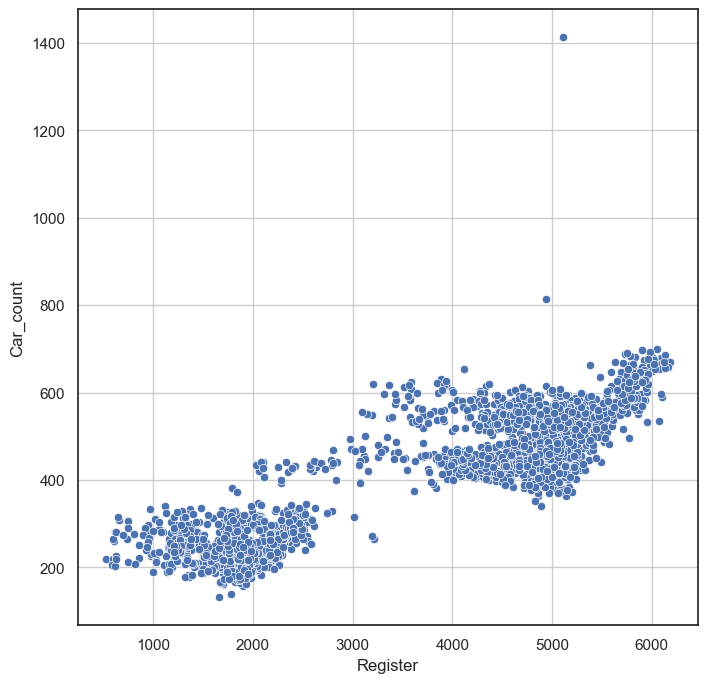

In [ ]:
eda_2_nn(data1, 'Car_count', 'Register')

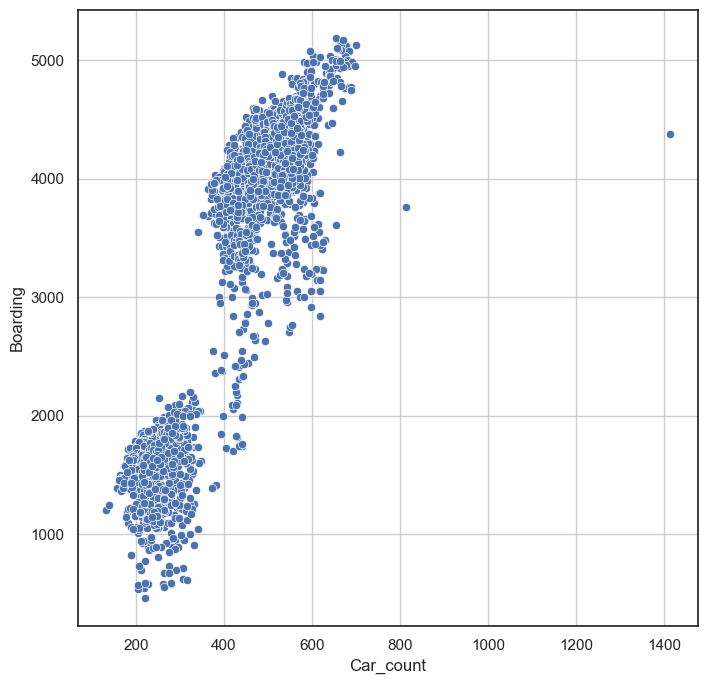

In [ ]:
eda_2_nn(data1, 'Boarding', 'Car_count')

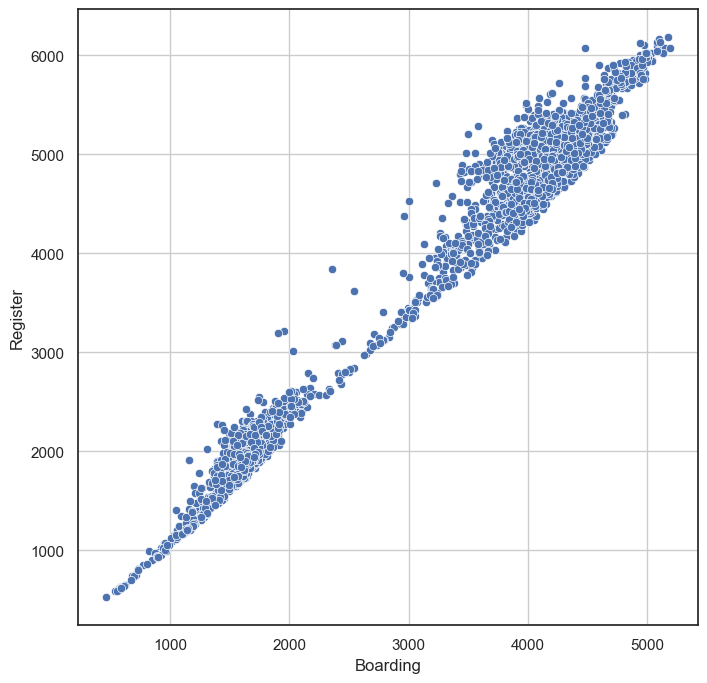

In [ ]:
eda_2_nn(data1, 'Register', 'Boarding')

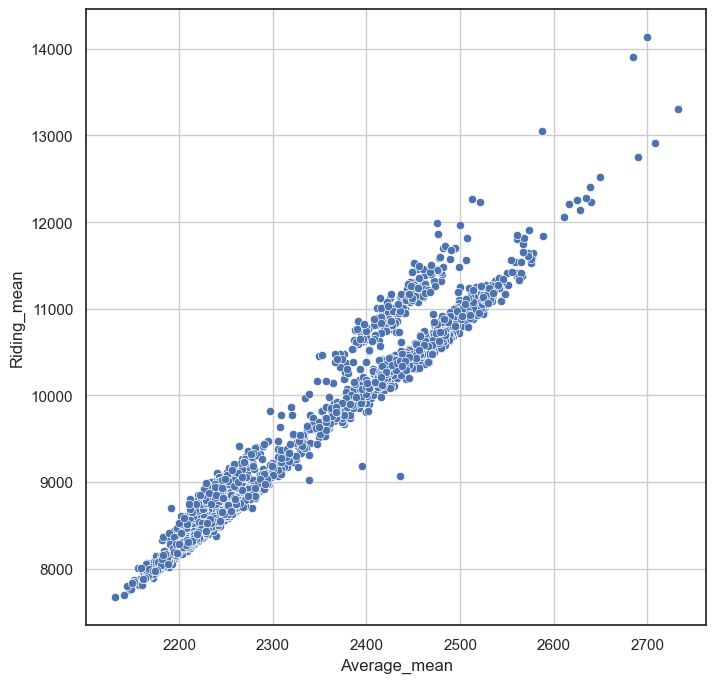

In [ ]:
eda_2_nn(data1, 'Riding_mean', 'Average_mean')

* fare

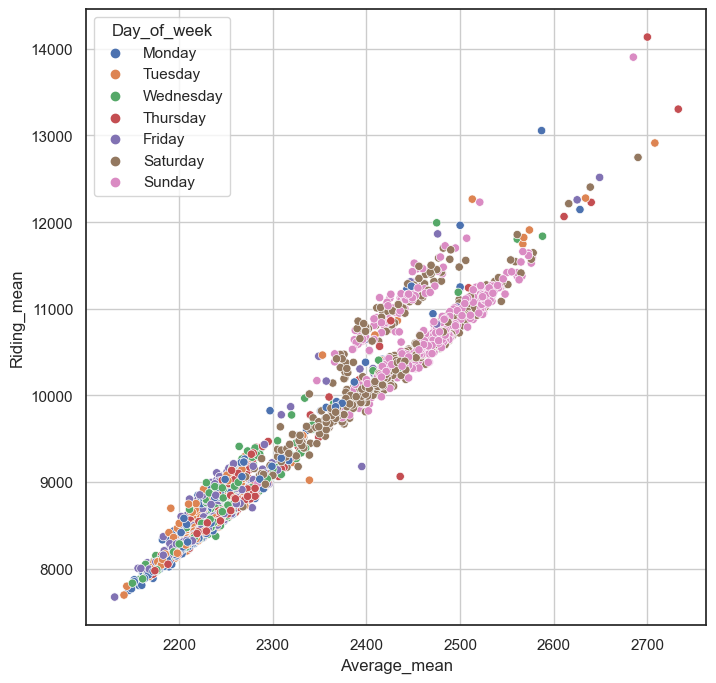

In [ ]:
eda_2_nn(data1, 'Riding_mean', 'Average_mean', 'Day_of_week')

### (2) 범주 feature --> Target

In [ ]:
data1.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Day_of_week', 'Month', 'Year',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'season', 'holiday',
       '7_day_wait_time_mean', 'Cancel', 'Total_wait', 'Boarding_rate'],
      dtype='object')

* 휴일 여부

In [ ]:

target = 'waiting_time'

In [ ]:
# t-test
#h0 = data1.loc[data1['holiday']==0, 'target']
#h1 = data1.loc[data1['holiday']==1, 'target']
#spst.ttest_ind(h0, h1)

* 요일

In [ ]:

target = 'waiting_time'


In [ ]:
# anova
#temp = data1.loc[data1['Day_of_week'].notnull()]

#w0 = temp.loc[temp['Day_of_week']=='Monday', 'target']
#w1 = temp.loc[temp['Day_of_week']=='Tuesday', 'target']
#w2 = temp.loc[temp['Day_of_week']=='Wednesday', 'target']
#w3 = temp.loc[temp['Day_of_week']=='Thursday', 'target']
#w4 = temp.loc[temp['Day_of_week']=='Friday', 'target']
#w5 = temp.loc[temp['Day_of_week']=='Saturday', 'target']
#w6 = temp.loc[temp['Day_of_week']=='Sunday', 'target']

#spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

* 계절

In [ ]:
# sns.barplot(x = 'season', y = 'target', data = data)
# plt.grid()
# plt.show()

In [ ]:
# # anova
# temp = data.loc[data['season'].notnull()]

# s0 = temp.loc[temp['season']=='Spring', 'target']
# s1 = temp.loc[temp['season']=='Summer', 'target']
# s2 = temp.loc[temp['season']=='Fall', 'target']
# s3 = temp.loc[temp['season']=='Winter', 'target']

# spst.f_oneway(s0,s1,s2,s3)

## 4.데이터 저장

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1.to_csv('data2.csv', index=False)
